# MNIST Handwritten Digit Classification

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Data Import 

In [2]:
#reading input from csv file
digits = pd.read_csv("E:\\VAIBHAV\\Machine Learning Project data\\train.csv")

In [3]:
digits.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploratory data Analysis

In [4]:
# checking datatype
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
digits.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
digits.shape

(42000, 785)

In [7]:
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
#cheching for null values
digits.isna().count()

label       42000
pixel0      42000
pixel1      42000
pixel2      42000
pixel3      42000
            ...  
pixel779    42000
pixel780    42000
pixel781    42000
pixel782    42000
pixel783    42000
Length: 785, dtype: int64

In [9]:
np.unique(digits['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [10]:
digits['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [11]:
# splitting into x and y
x = digits.drop("label", axis = 1)
y = digits['label']

In [12]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

# visualing the pixel and label

<AxesSubplot: >

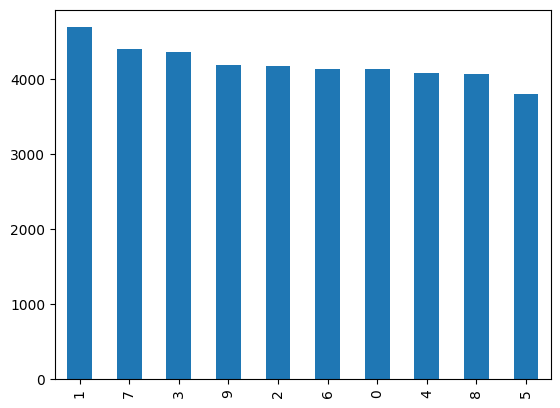

In [13]:
y.value_counts().plot(kind='bar')

<Figure size 500x500 with 0 Axes>

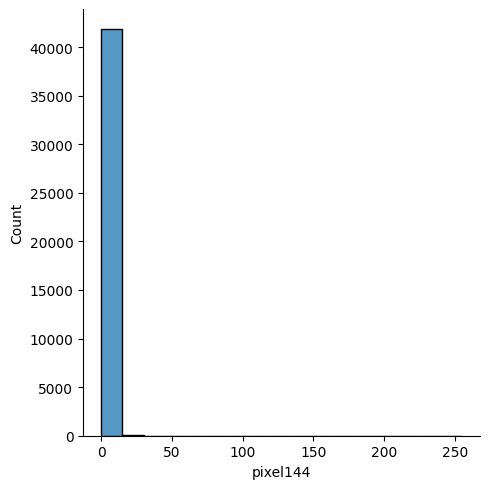

In [14]:
plt.figure(figsize=(5,5))
sns.displot(x['pixel144'])
plt.show()

<Figure size 500x500 with 0 Axes>

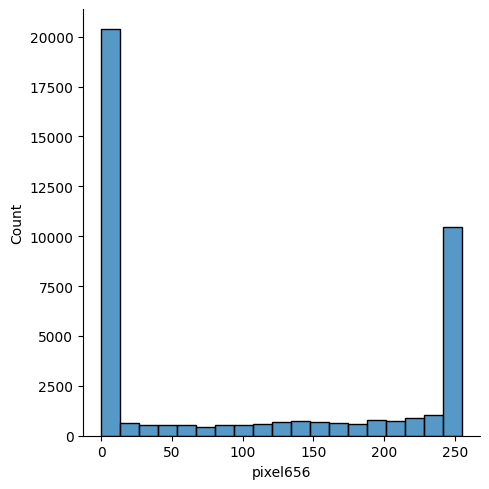

In [15]:
plt.figure(figsize=(5,5))
sns.displot(x['pixel656'])
plt.show()

<AxesSubplot: xlabel='label', ylabel='pixel684'>

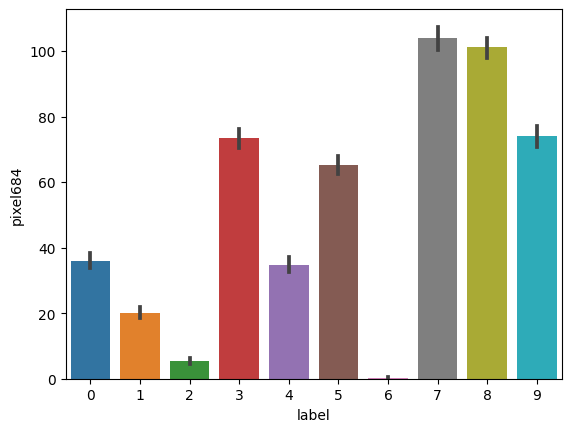

In [16]:
sns.barplot(x = 'label', y ='pixel684', data=digits)

<AxesSubplot: xlabel='label', ylabel='pixel572'>

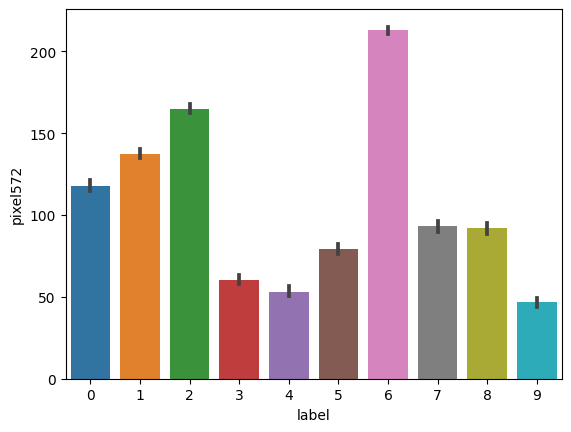

In [17]:
sns.barplot(x = 'label', y ='pixel572', data=digits)

## visualize few numbers 

In [18]:
x.iloc[2, 0:]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 2, Length: 784, dtype: int64

Text(0.5, 1.0, 'One 1')

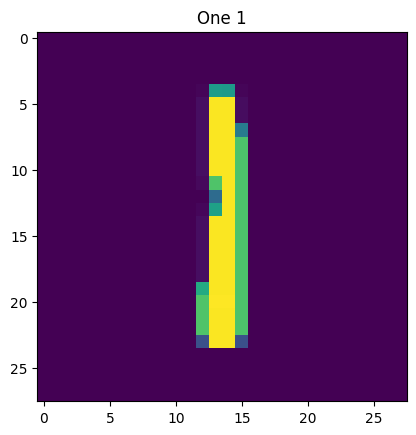

In [19]:
one = x.iloc[2,0:]
one = one.values.reshape(28,28)
plt.imshow(one)
plt.title("One 1")

Text(0.5, 1.0, 'Zero 0')

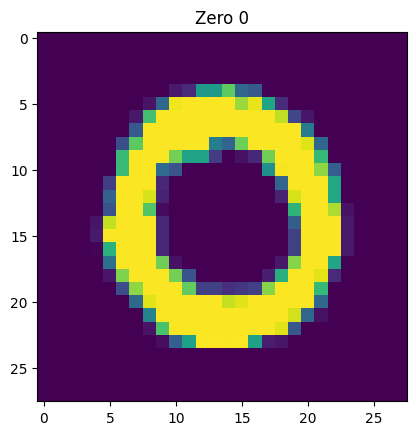

In [20]:
zero = x.iloc[1, 0:]
zero = zero.values.reshape(28 ,28)
plt.imshow(zero)
plt.title("Zero 0")

## Check the heatmap

Text(0.5, 1.0, 'heatmap')

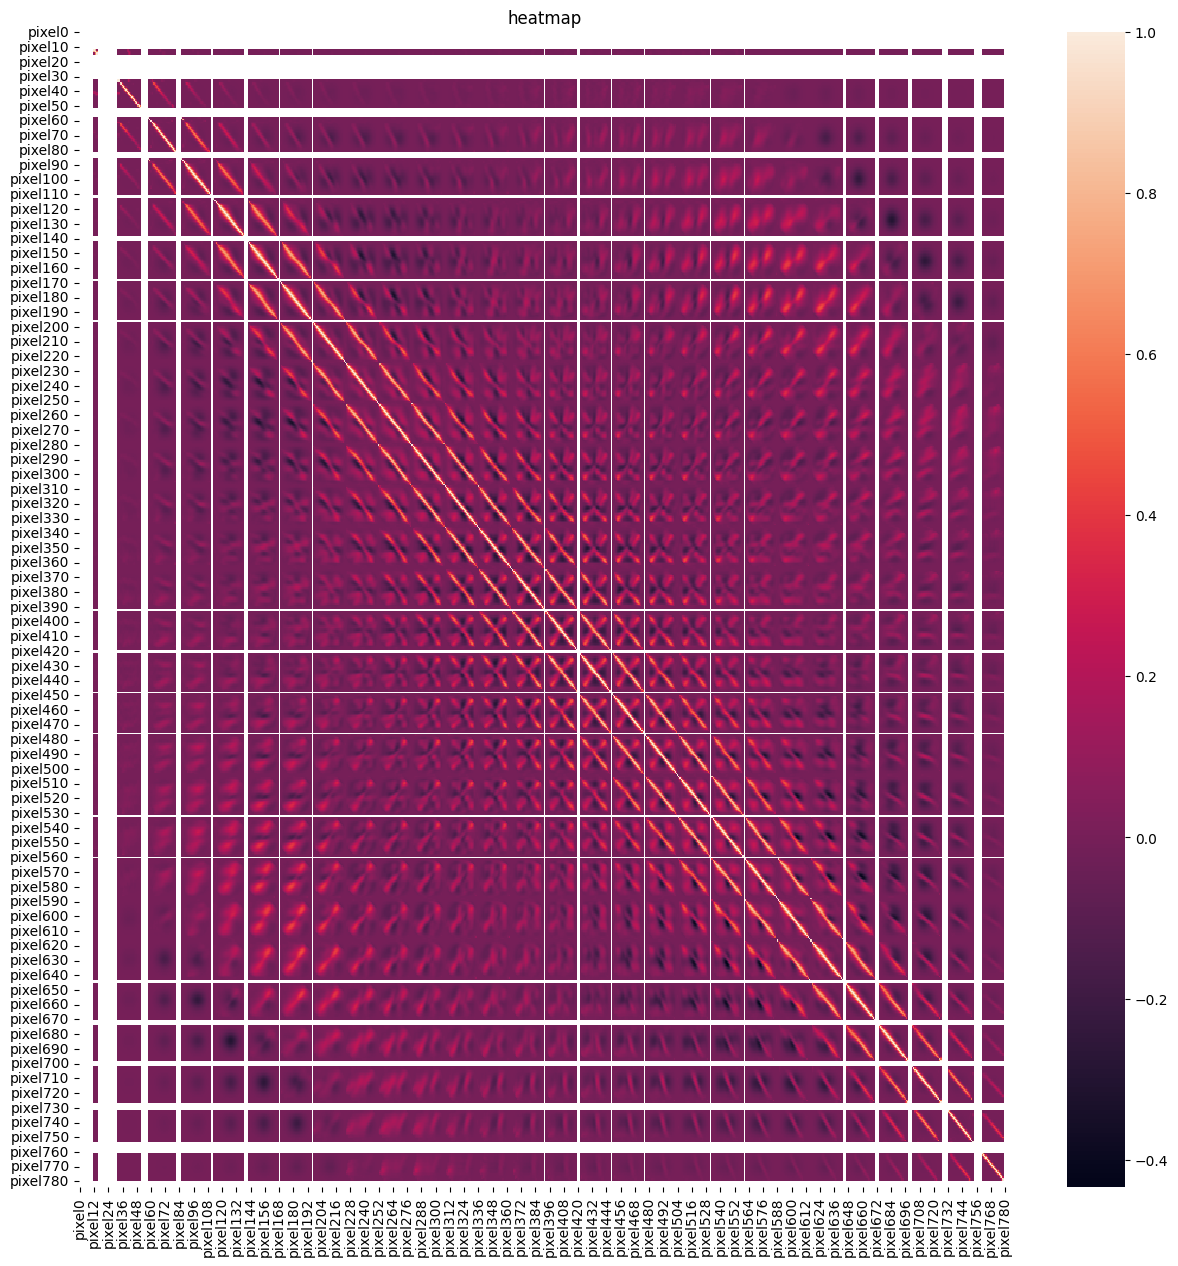

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(data=x.corr(),annot=False)
plt.title('heatmap')

### Splitng the Data into train and test¶

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
x_train.shape

(33600, 784)

In [25]:
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (33600, 784)
x_test: (8400, 784)
y_train: (33600,)
y_test: (8400,)


## Model Buliding

In [26]:
from sklearn.svm import SVC

In [27]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [28]:
model.predict(x_test)

array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

In [29]:
# predict
y_pred = model.predict(x_test)

## confusion matrix and accuracy

In [30]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [31]:
# confusion matrix and accuracy

# accuracy
print('accuracy:', metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

#cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.973452380952381 

[[807   0   0   0   2   1   4   0   1   1]
 [  0 902   1   1   1   1   0   1   1   1]
 [  3   3 820   2   8   0   3   3   4   0]
 [  1   3   5 898   0   9   0   6  11   4]
 [  1   0   1   0 815   1   5   3   0  13]
 [  1   1   1   8   2 679   6   0   2   2]
 [  3   1   0   0   0   1 777   0   3   0]
 [  0   2   7   0   4   1   0 867   2  10]
 [  1   2   3   7   5   4   0   2 810   1]
 [  2   2   1  10  10   1   0   7   3 802]]


In [32]:
cm =confusion_matrix(y_true=y_test, y_pred=y_pred)

Text(158.22222222222223, 0.5, 'label')

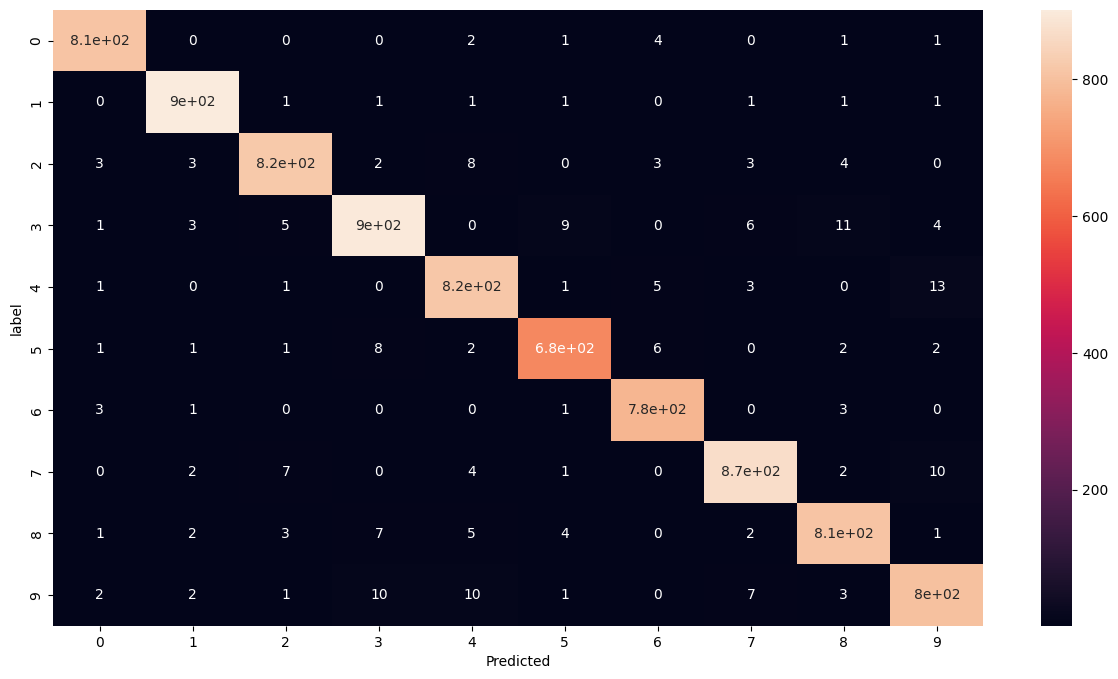

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(cm , annot=True,vmin=True )
plt.xlabel("Predicted")
plt.ylabel("label")

In [34]:
non_linear_model = SVC(kernel='rbf')

In [35]:
non_linear_model.fit(x_train, y_train)

SVC()

In [36]:
# predict
y_pred = non_linear_model.predict(x_test)

In [37]:
# confusion matrix and accuracy
print('accuracy:', metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

#cm 
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.973452380952381 

[[807   0   0   0   2   1   4   0   1   1]
 [  0 902   1   1   1   1   0   1   1   1]
 [  3   3 820   2   8   0   3   3   4   0]
 [  1   3   5 898   0   9   0   6  11   4]
 [  1   0   1   0 815   1   5   3   0  13]
 [  1   1   1   8   2 679   6   0   2   2]
 [  3   1   0   0   0   1 777   0   3   0]
 [  0   2   7   0   4   1   0 867   2  10]
 [  1   2   3   7   5   4   0   2 810   1]
 [  2   2   1  10  10   1   0   7   3 802]]


## Final Model

In [ ]:
# # model with optimal hyperparameters
# model = SVC(C=10 , gamma=5, kernel='rbf')

# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)

In [ ]:
# #metrics
# print('accuracy:', metrics.accuracy_score(y_test, y_pred), "\n")
# print(metrics.confusion_matrix(y_test, y_pred), "\n")